In [1]:
import os
os.chdir("/content/drive/My Drive/SiameseNetworks")
print(os.getcwd())

/content/drive/My Drive/SiameseNetworks


Using TensorFlow backend.


Streaming output truncated to the last 5000 lines.
Cut-off: 0.0
{'tp': 50, 'fp': 50, 'tn': 0, 'fn': 0}
FPR: 1.0, TPR: 1.0
Accuracy: 0.5
---------------------------------
Cut-off: 0.001001001001001001
{'tp': 49, 'fp': 29, 'tn': 21, 'fn': 1}
FPR: 0.58, TPR: 0.98
Accuracy: 0.7
---------------------------------
Cut-off: 0.002002002002002002
{'tp': 49, 'fp': 25, 'tn': 25, 'fn': 1}
FPR: 0.5, TPR: 0.98
Accuracy: 0.74
---------------------------------
Cut-off: 0.003003003003003003
{'tp': 48, 'fp': 20, 'tn': 30, 'fn': 2}
FPR: 0.4, TPR: 0.96
Accuracy: 0.78
---------------------------------
Cut-off: 0.004004004004004004
{'tp': 48, 'fp': 18, 'tn': 32, 'fn': 2}
FPR: 0.36, TPR: 0.96
Accuracy: 0.8
---------------------------------
Cut-off: 0.005005005005005005
{'tp': 48, 'fp': 16, 'tn': 34, 'fn': 2}
FPR: 0.32, TPR: 0.96
Accuracy: 0.82
---------------------------------
Cut-off: 0.006006006006006006
{'tp': 48, 'fp': 12, 'tn': 38, 'fn': 2}
FPR: 0.24, TPR: 0.96
Accuracy: 0.86
----------------------------

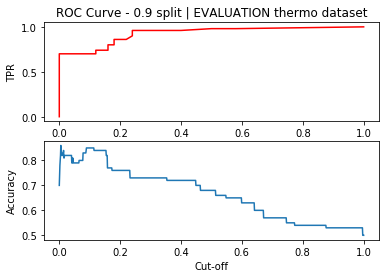

In [2]:
import matplotlib.pyplot as plt
import os
import pickle
import numpy as np
from dataset.yalefaces import Yalefaces
from dataset.thermo import Thermo
from arch_model.arch_model import ArchModel
from testers import testers
from trainers.batch_trainer import BatchTrainer

def FPR(table):
    try:
        fpr = table["fp"]/(table["fp"] + table["tn"])
        return fpr
    except ZeroDivisionError:
        pass

def TPR(table):
    try:
        tpr = table["tp"]/(table["tp"] + table["fn"])
        return tpr
    except ZeroDivisionError:
        pass

if __name__ == "__main__":
    accuracies = []
    confusion_tables = []
    table_model = {"tp": 0, "fp": 0, "tn": 0, "fn": 0}
    batch_size = 100
    split = 0.9
    dataset_name = Thermo().dataset_name
    weights_path = f"training_weights/thermo/{split}"
    model_weigths = "weights_0.23999999463558197_2020-02-24 21:01:35.001857.h5"
    cuts = 1000
    cut_perc = np.linspace(0, 1, cuts)
    ROC = []

    (dataset_train, dataset_eval) = Thermo().get(split=split)
    model = ArchModel().get_arch('siam')
    model.load_weights(os.path.join(weights_path, model_weigths))

    datasets = [dataset_eval, dataset_train]

    label = "EVALUATION"

    print("Getting batch of images...")
    (pairs, targets) = BatchTrainer().get_batch(batch_size=batch_size, dataset=dataset_eval)
    probs = model.predict(pairs)
    targets = targets.tolist()
    probs = probs.tolist()


    for cut in cut_perc:
        print("---------------------------------")
        print(f"Cut-off: {cut}")
        _table = table_model.copy()
        (tp, fp, tn, fn) = testers.predictions(probs, targets, cut)
        _table["tp"] = tp
        _table["fp"] = fp
        _table["tn"] = tn
        _table["fn"] = fn
        acc = (_table["tp"] + _table["tn"])/(_table["tp"] + _table["tn"] + _table["fn"] + _table["fp"])
        accuracies.append(acc)
        print(_table)
        print(f"FPR: {FPR(_table)}, TPR: {TPR(_table)}")
        print(f"Accuracy: {acc}")
        confusion_tables.append(_table)

    with open(os.path.join(os.getcwd(), "confusion_tables.pickle"), "wb") as f:
        pickle.dump(confusion_tables, f)

    ROC_x = np.array(list(FPR(table) for table in confusion_tables))
    ROC_y = np.array(list(TPR(table) for table in confusion_tables))
    ROC = np.array([ROC_x, ROC_y])

    plt.subplot(2, 1, 1)
    plt.plot(ROC_x, ROC_y, 'r')
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.title(f'ROC Curve - {split} split | {label} {dataset_name} dataset')

    plt.subplot(2, 1, 2)
    a = plt.plot(cut_perc[1:], accuracies[1:])
    plt.ylabel('Accuracy')
    plt.xlabel('Cut-off')
    plt.show()

    accuracies.clear()
    confusion_tables.clear()



Streaming output truncated to the last 5000 lines.
Cut-off: 0.0
{'tp': 50, 'fp': 50, 'tn': 0, 'fn': 0}
FPR: 1.0, TPR: 1.0
Accuracy: 0.5
---------------------------------
Cut-off: 0.001001001001001001
{'tp': 50, 'fp': 27, 'tn': 23, 'fn': 0}
FPR: 0.54, TPR: 1.0
Accuracy: 0.73
---------------------------------
Cut-off: 0.002002002002002002
{'tp': 50, 'fp': 18, 'tn': 32, 'fn': 0}
FPR: 0.36, TPR: 1.0
Accuracy: 0.82
---------------------------------
Cut-off: 0.003003003003003003
{'tp': 50, 'fp': 15, 'tn': 35, 'fn': 0}
FPR: 0.3, TPR: 1.0
Accuracy: 0.85
---------------------------------
Cut-off: 0.004004004004004004
{'tp': 50, 'fp': 14, 'tn': 36, 'fn': 0}
FPR: 0.28, TPR: 1.0
Accuracy: 0.86
---------------------------------
Cut-off: 0.005005005005005005
{'tp': 50, 'fp': 14, 'tn': 36, 'fn': 0}
FPR: 0.28, TPR: 1.0
Accuracy: 0.86
---------------------------------
Cut-off: 0.006006006006006006
{'tp': 50, 'fp': 12, 'tn': 38, 'fn': 0}
FPR: 0.24, TPR: 1.0
Accuracy: 0.88
-------------------------------

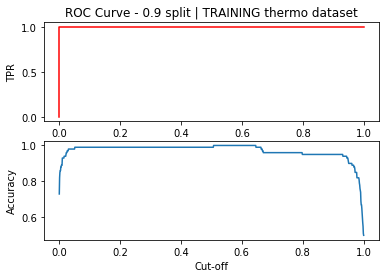

In [3]:
  label = "TRAINING"

  print("Getting batch of images...")
  (pairs, targets) = BatchTrainer().get_batch(batch_size=batch_size, dataset=dataset_train)
  probs = model.predict(pairs)
  targets = targets.tolist()
  probs = probs.tolist()


  for cut in cut_perc:
      print("---------------------------------")
      print(f"Cut-off: {cut}")
      _table = table_model.copy()
      (tp, fp, tn, fn) = testers.predictions(probs, targets, cut)
      _table["tp"] = tp
      _table["fp"] = fp
      _table["tn"] = tn
      _table["fn"] = fn
      acc = (_table["tp"] + _table["tn"])/(_table["tp"] + _table["tn"] + _table["fn"] + _table["fp"])
      accuracies.append(acc)
      print(_table)
      print(f"FPR: {FPR(_table)}, TPR: {TPR(_table)}")
      print(f"Accuracy: {acc}")
      confusion_tables.append(_table)

  with open(os.path.join(os.getcwd(), "confusion_tables.pickle"), "wb") as f:
      pickle.dump(confusion_tables, f)

  ROC_x = np.array(list(FPR(table) for table in confusion_tables))
  ROC_y = np.array(list(TPR(table) for table in confusion_tables))
  ROC = np.array([ROC_x, ROC_y])

  plt.subplot(2, 1, 1)
  plt.plot(ROC_x, ROC_y, 'r')
  plt.ylabel('TPR')
  plt.xlabel('FPR')
  plt.title(f'ROC Curve - {split} split | {label} {dataset_name} dataset')

  plt.subplot(2, 1, 2)
  a = plt.plot(cut_perc[1:], accuracies[1:])
  plt.ylabel('Accuracy')
  plt.xlabel('Cut-off')
  plt.show()

  accuracies.clear()
  confusion_tables.clear()
